In [14]:
# defining functions for EFE precision updating and resuls plotting

def EFE_precision_updating(E_0, G_0, F_o, gamma_0, psi = 2, n_updates = 16):
    # see page 20 in paper for explanation of these eq's
    
    gamma = gamma_0             # Initial expected free energy precision to be updated
    beta_prior = 1/gamma        # Initial prior on expected free energy precision gamma, a rate parameter on a Gamma dist with shape param = 1
    beta_posterior = beta_prior # Initial posterior on expected free energy precision gamma, a rate parameter on a Gamma dist
    # Expected value of gamma is reciprocal of beta
    
    gamma_dopamine = np.zeros((n_updates))
    policies_neural = np.zeros((len(G), n_updates))
    
    for ni in range(n_updates):# = 1:16 # number of variational updates (16)

        # calculate prior and posterior over policies (see main text for 
        # explanation of equations) 

        pi_0 = np.exp(np.log(E) - gamma*G)/sum(np.exp(np.log(E) - gamma*G)); # prior over policies (softmax)

        pi_posterior = np.exp(np.log(E) - gamma*G - F)/sum(np.exp(np.log(E) - gamma*G - F)); # posterior 
                                                                                 # over policies (softmax)
        # calculate expected free energy precision 
        G_error = (pi_posterior - pi_0)@-G; # expected free energy prediction error

        beta_update = beta_posterior - beta_prior + G_error; # change in beta:  
                                                             # gradient of F with respect to gamma 
                                                             # (recall gamma = 1/beta)

        beta_posterior = beta_posterior - beta_update/psi; # update posterior precision 
                                                       # estimate (with step size of psi = 2, which reduces 
                                                       # the magnitude of each update and can promote 
                                                       # stable convergence)

        gamma = 1/beta_posterior; # update expected free energy precision # Expected value of gamma is reciprocal of beta


        # simulate dopamine responses

        n = ni;

        gamma_dopamine[n] = gamma; # simulated neural encoding of precision
                                     # (beta_posterior^-1) at each iteration of 
                                     # variational updating                                 

        policies_neural[:, n] = pi_posterior; # neural encoding of posterior over policies at 
                                             # each iteration of variational updating

    return gamma_dopamine, policies_neural

def plot_EFE_updating(gamma_dopamine, policies_neural = None):
    ## Show Results

    gamma_dopamine_plot = np.hstack((np.ones((3, )),gamma_dopamine)) # include prior value

    plt.figure()
    plt.plot(gamma_dopamine_plot);
    plt.ylim([np.min(gamma_dopamine_plot)-.05, np.max(gamma_dopamine_plot)+.05])
    plt.title('Expected Free Energy Precision (Tonic Dopamine)');
    plt.xlabel('Updates');
    plt.ylabel('$\gamma$');

    plt.figure()
    plt.plot(np.gradient(gamma_dopamine_plot),'r');
    plt.ylim([np.min(np.gradient(gamma_dopamine_plot))-.01, np.max(np.gradient(gamma_dopamine_plot))+.01])
    plt.title('Rate of Change in Precision (Phasic Dopamine)');
    plt.xlabel('Updates');
    plt.ylabel('$\gamma$ gradient');
    plt.show()
    # uncomment if you want to printlay/plot firing rates encoding beliefs about each
    
    if policies_neural is not None:

        # policy (columns = policies, rows = updates over time)
        plt.clf()
        plt.plot(policies_neural);
        plt.show()
        print('Firing rates encoding beliefs over policies:');
        print(policies_neural.T);
        print(' ');


 
Final Policy Prior:
[0.02214869 0.91136123 0.02219271 0.02214869 0.02214869]
 
Final Policy Posterior:
[5.43818445e-09 9.76227697e-01 2.37722873e-02 5.34117285e-09
 5.34117285e-09]
 
Final Policy Difference Vector:
[-0.02214868  0.06486647  0.00157957 -0.02214868 -0.02214868]
 
Negative Expected Free Energy:
[-12.505   -9.51   -12.5034 -12.505  -12.505 ]
 
Prior G Precision (Prior Gamma):
1
 
Posterior G Precision (Gamma):
1.2411222533214157
 


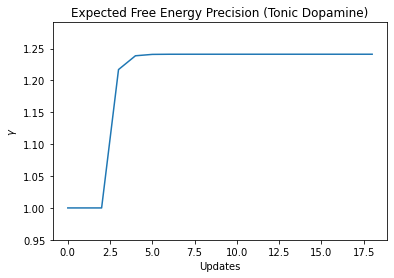

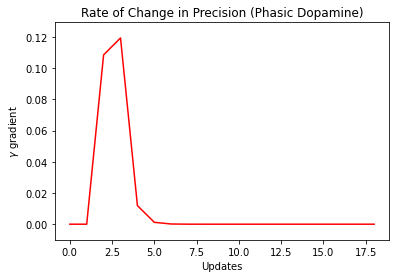

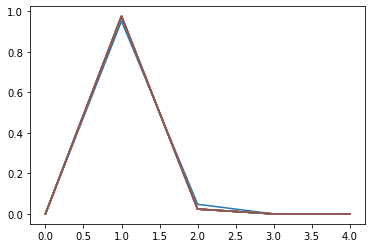

Firing rates encoding beliefs over policies:
[[1.09218400e-08 9.52275038e-01 4.77249298e-02 1.07270057e-08
  1.07270057e-08]
 [5.83400750e-09 9.74498390e-01 2.55015928e-02 5.72993483e-09
  5.72993483e-09]
 [5.47683893e-09 9.76058816e-01 2.39411673e-02 5.37913778e-09
  5.37913778e-09]
 [5.44211725e-09 9.76210514e-01 2.37894696e-02 5.34503550e-09
  5.34503550e-09]
 [5.43858625e-09 9.76225941e-01 2.37740427e-02 5.34156748e-09
  5.34156748e-09]
 [5.43822552e-09 9.76227517e-01 2.37724667e-02 5.34121319e-09
  5.34121319e-09]
 [5.43818865e-09 9.76227678e-01 2.37723056e-02 5.34117698e-09
  5.34117698e-09]
 [5.43818488e-09 9.76227695e-01 2.37722891e-02 5.34117327e-09
  5.34117327e-09]
 [5.43818449e-09 9.76227696e-01 2.37722875e-02 5.34117290e-09
  5.34117290e-09]
 [5.43818445e-09 9.76227697e-01 2.37722873e-02 5.34117286e-09
  5.34117286e-09]
 [5.43818445e-09 9.76227697e-01 2.37722873e-02 5.34117285e-09
  5.34117285e-09]
 [5.43818445e-09 9.76227697e-01 2.37722873e-02 5.34117285e-09
  5.34117285e

In [34]:
## original adapted snippet, also includes the functions

# Example code for simulated expected free energy precision (beta/gamma) updates
# (associated with dopamine in the neural process theory)

# Supplementary Code for: A Step-by-Step Tutorial on Active Inference Modelling and its 
# Application to Empirical Data

# By: Ryan Smith, Karl J. Friston, Christopher J. Whyte
# python adaption by Xaver Funk

###########################################################################

# EXPLANATIONS of terms see p. 18 in text

# This script will reproduce the simulation results in Figure 9
import numpy as np
import matplotlib.pyplot as plt

# Here you can set the number of policies and the distributions that
# contribute to prior and posterior policy precision

# inclusion or not of these terms E, F, gamma is a modeling decision
E = np.ones(5)#[1 1 1 1 1]';                  # Set a fixed-form prior distribution 
                                              # over policies (habits)
                            # reflecting number of times a policy has previously been chosen

G = np.array([12.505, 9.51, 12.5034, 12.505, 12.505])#';     # Set an example expected 
                                              # expected free energy distribution over policies

F = np.array([17.0207, 1.7321, 1.7321, 17.0387, 17.0387])#'; # Set an example variational 
                                              # free energy distribution over 
                                              # policies after a new observation
        # the observation is consistent with the policies that got higher values


gamma_0 = 1                 # Starting expected free energy precision value
psi = 2                     # Step size parameter (promotes stable convergence) 
n_updates = 16

gamma_dopamine = np.zeros((n_updates))
policies_neural = np.zeros((len(G), n_updates))

def EFE_precision_updating(E_0, G_0, F_o, gamma_0, psi = 2, n_updates = 16):
    # see page 20 in paper for explanation of these eq's
    
    gamma = gamma_0             # Initial expected free energy precision to be updated
    beta_prior = 1/gamma        # Initial prior on expected free energy precision gamma, a rate parameter on a Gamma dist with shape param = 1
    beta_posterior = beta_prior # Initial posterior on expected free energy precision gamma, a rate parameter on a Gamma dist
    # Expected value of gamma is reciprocal of beta
    
    gamma_dopamine = np.zeros((n_updates))
    policies_neural = np.zeros((len(G), n_updates))
    
    for ni in range(n_updates):# = 1:16 # number of variational updates (16)

        # calculate prior and posterior over policies (see main text for 
        # explanation of equations) 

        pi_0 = np.exp(np.log(E) - gamma*G)/sum(np.exp(np.log(E) - gamma*G)); # prior over policies (softmax)

        pi_posterior = np.exp(np.log(E) - gamma*G - F)/sum(np.exp(np.log(E) - gamma*G - F)); # posterior 
                                                                                 # over policies (softmax)
        # calculate expected free energy precision 
        G_error = (pi_posterior - pi_0)@-G; # expected free energy prediction error

        beta_update = beta_posterior - beta_prior + G_error; # change in beta:  
                                                             # gradient of F with respect to gamma 
                                                             # (recall gamma = 1/beta)

        beta_posterior = beta_posterior - beta_update/psi; # update posterior precision 
                                                       # estimate (with step size of psi = 2, which reduces 
                                                       # the magnitude of each update and can promote 
                                                       # stable convergence)

        gamma = 1/beta_posterior; # update expected free energy precision # Expected value of gamma is reciprocal of beta


        # simulate dopamine responses

        n = ni;

        gamma_dopamine[n] = gamma; # simulated neural encoding of precision
                                     # (beta_posterior^-1) at each iteration of 
                                     # variational updating                                 

        policies_neural[:, n] = pi_posterior; # neural encoding of posterior over policies at 
                                             # each iteration of variational updating

            
    print(' ');
    print('Final Policy Prior:');
    print(pi_0);
    print(' ');
    print('Final Policy Posterior:');
    print(pi_posterior);
    print(' ');
    print('Final Policy Difference Vector:');
    print(pi_posterior-pi_0);
    print(' ');
    print('Negative Expected Free Energy:');
    print(-G);
    print(' ');
    print('Prior G Precision (Prior Gamma):');
    print(gamma_0);
    print(' ');
    print('Posterior G Precision (Gamma):');
    print(gamma);
    print(' ');
    
    return gamma_dopamine, policies_neural

gamma_dopamine, policies_neural = EFE_precision_updating(E, G, F, gamma_0)
    
def plot_EFE_updating(gamma_dopamine, policies_neural = None):
    ## Show Results

    gamma_dopamine_plot = np.hstack((np.ones((3, )),gamma_dopamine)) # include prior value

    plt.figure()
    plt.plot(gamma_dopamine_plot);
    plt.ylim([np.min(gamma_dopamine_plot)-.05, np.max(gamma_dopamine_plot)+.05])
    plt.title('Expected Free Energy Precision (Tonic Dopamine)');
    plt.xlabel('Updates');
    plt.ylabel('$\gamma$');

    plt.figure()
    plt.plot(np.gradient(gamma_dopamine_plot),'r');
    plt.ylim([np.min(np.gradient(gamma_dopamine_plot))-.01, np.max(np.gradient(gamma_dopamine_plot))+.01])
    plt.title('Rate of Change in Precision (Phasic Dopamine)');
    plt.xlabel('Updates');
    plt.ylabel('$\gamma$ gradient');
    plt.show()
    # uncomment if you want to printlay/plot firing rates encoding beliefs about each
    
    if policies_neural is not None:

        # policy (columns = policies, rows = updates over time)
        plt.clf()
        plt.plot(policies_neural);
        plt.show()
        print('Firing rates encoding beliefs over policies:');
        print(policies_neural.T);
        print(' ');

plot_EFE_updating(gamma_dopamine, policies_neural)

 
Final Policy Prior:
[0.7566258 0.2433742]
 
Final Policy Posterior:
[1.74185273e-08 9.99999983e-01]
 
Final Policy Difference Vector:
[-0.75662578  0.75662578]
 
Negative Expected Free Energy:
[-1 -9]
 
Prior G Precision (Prior Gamma):
1
 
Posterior G Precision (Gamma):
0.14178354460594456
 


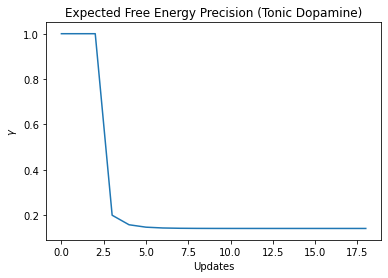

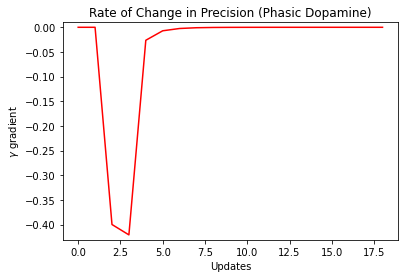

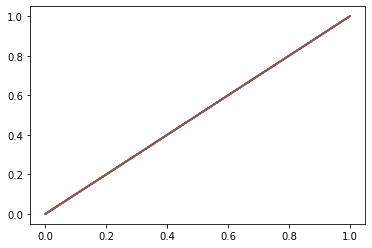

Firing rates encoding beliefs over policies:
[[1.67014218e-05 9.99983299e-01]
 [2.77633432e-08 9.99999972e-01]
 [1.98372996e-08 9.99999980e-01]
 [1.82234162e-08 9.99999982e-01]
 [1.77113971e-08 9.99999982e-01]
 [1.75283279e-08 9.99999982e-01]
 [1.74601414e-08 9.99999983e-01]
 [1.74343609e-08 9.99999983e-01]
 [1.74245584e-08 9.99999983e-01]
 [1.74208232e-08 9.99999983e-01]
 [1.74193988e-08 9.99999983e-01]
 [1.74188554e-08 9.99999983e-01]
 [1.74186481e-08 9.99999983e-01]
 [1.74185690e-08 9.99999983e-01]
 [1.74185388e-08 9.99999983e-01]
 [1.74185273e-08 9.99999983e-01]]
 


In [37]:
import numpy as np
import matplotlib.pyplot as plt

# neat for playing around, this uses the functions defined above

# Here you can set the number of policies and the distributions that
# contribute to prior and posterior policy precision

# inclusion or not of these terms E, F, gamma is a modeling decision
E = np.ones(2)#[1 1 1 1 1]';                  # Set a fixed-form prior distribution 
                                              # over policies (habits)
                            # reflecting number of times a policy has previously been chosen

G = np.array([1,9])#';     # Set an example expected 
                                              # expected free energy distribution over policies

F = np.array([20,1])#'; # Set an example variational 
                                              # free energy distribution over 
                                              # policies after a new observation
        # the observation is consistent with the policies that got higher values


gamma_0 = 1                 # Starting expected free energy precision value
psi = 2                     # Step size parameter (promotes stable convergence) 
n_updates = 16

gamma_dopamine = np.zeros((n_updates))
policies_neural = np.zeros((len(G), n_updates))

# do updating
gamma_dopamine, policies_neural = EFE_precision_updating(E, G, F, gamma_0, psi, n_updates)
# do plotting
plot_EFE_updating(gamma_dopamine, policies_neural)

In [29]:
# reproduced from equations

from scipy.special import softmax
import numpy as np

E = np.ones(5)#np.array([3, 4, 5, 1, 1]) # prior over policies
G = np.array([12.505, 9.51, 12.5034, 12.505, 12.505])#';     # Set an example expected 
F = np.array([17.0207, 1.7321, 1.7321, 17.0387, 17.0387])#'; # Set an example variational 

#G = np.array([3, 4, 5, 1, 1]) # expected free energy
#F = np.array([5, 11, 2, 8, 1]) # free energy on new observations

beta_0 = 1
gamma = 1/beta_0
psi = 2
n = 16
beta = beta_0

gamma_dopamine = np.zeros((n))
policies_neural = np.zeros((len(G), n))

for i in range(n):
    
    pi_0 = softmax(np.log(E) - gamma * G) # prior over policies
    pi = softmax(np.log(E) - F - gamma * G) # posterior over policies
    G_err = (pi - pi_0) @ - G # G prediction error
    beta_up = beta - beta_0 + G_err # beta update term: grdient of F wrt gamma
    beta = beta - beta_up/psi # udate beta 
    gamma = 1/beta # update gamma

    gamma_dopamine[i] = gamma
    policies_neural[:, 1] = pi

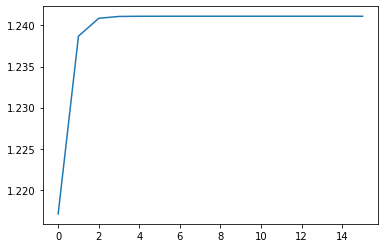

In [30]:
import matplotlib.pyplot as plt
plt.plot(gamma_dopamine)